In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io, color

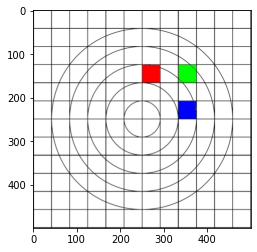

In [124]:
img = io.imread('test_grid.jpg')
#img = io.imread('dist_house.jpg')
#img = color.rgb2gray(rgb_img)
plt.imshow(img)

In [125]:
# t array 2D
def translate(image, t):
    width,height=image.shape[:2]   
    dst = np.zeros((width*2, height*2, 3), dtype=np.uint8)
    # INVERSE MAPPING Loop over the destination, not the source, to ensure that you cover
    # every destination pixel exactly 1 time.
    for u in range(width):
        for v in range(height):
            x = u-t[0]
            y = v-t[1]
            intx, inty = int(x), int(y)
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            if 0 < x < width-1 and 0 < y < height-1:
               #dst[u, v] = image[intx, inty] # qui tronco
                dst[u, v] = fracx*fracy*image[intx, inty]+(1-fracx)*fracy*image[intx+1, inty]+fracx*(1-fracy)*image[intx, inty+1]+(1-fracx)*(1-fracy)*image[intx+1, inty+1]
    return dst

In [175]:
# t array 2D
def warp2(image):
    width,height=image.shape[:2]   
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    # INVERSE MAPPING Loop over the destination, not the source, to ensure that you cover
    # every destination pixel exactly 1 time.
    
    for u in range(width):
        for v in range(height):
            
            x = (2*u) / (width-1) 
            x /= 0.00001
            
            
            y = (2*v) / (width -1) 
            y /= 0.00001
            
            r = np.sqrt(x*x + y*y)
            r = np.sqrt(r)
            #r =  np.sin((np.pi* r )/ 2)
            phi = np.arctan2(y,x)
            
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            
            intx, inty = int(x), int(y)
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            if 0 < x < width-1 and 0 < y < height-1:
               #dst[u, v] = image[intx, inty] # qui tronco
                dst[u, v] = fracx*fracy*image[intx, inty]+(1-fracx)*fracy*image[intx+1, inty]+fracx*(1-fracy)*image[intx, inty+1]+(1-fracx)*(1-fracy)*image[intx+1, inty+1]
    return dst

In [ ]:
# t array 2D
def warp(image):
    width,height=image.shape[:2]   
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    # INVERSE MAPPING Loop over the destination, not the source, to ensure that you cover
    # every destination pixel exactly 1 time.
    
    for u in range(width):
        for v in range(height):

            u = fx-1(ix,iy);
            v = fy-1(ix,iy);
            
            intx, inty = int(x), int(y)
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            if 0 < x < width-1 and 0 < y < height-1:
               #dst[u, v] = image[intx, inty] # qui tronco
                dst[u, v] = fracx*fracy*image[intx, inty]+(1-fracx)*fracy*image[intx+1, inty]+fracx*(1-fracy)*image[intx, inty+1]+(1-fracx)*(1-fracy)*image[intx+1, inty+1]
    return dst

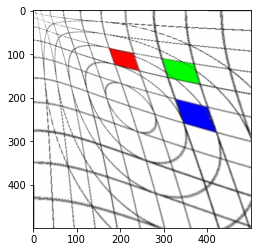

In [176]:
#img2 =translate(img,[-img.shape[0]//2,-img.shape[1]//2])
img3 = warp(img)
plt.imshow(img3)